In [18]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the style for better visualizations
plt.style.use('ggplot')

# Read the CSV file
df = pd.read_csv('condo_listings_solddata.csv')


# Convert Sold Date to datetime and remove invalid entries
df['Sold Date'] = pd.to_datetime(df['Sold Date'], errors='coerce')
df.dropna(subset=['Sold Date'], inplace=True)

df['Year'] = df['Sold Date'].dt.year
df['Month'] = df['Sold Date'].dt.month

# Display basic dataset information
print("Dataset shape:", df.shape)
print("First few rows:")
print(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (129575, 47)
First few rows:
  Prop Class       Area/City       Community Status  List Price Postal Code  \
0       COND         Airdrie     Big Springs      S      265000     T4A 2L1   
1       COND         Airdrie      Downtown_1      S      299999     T4B 3V7   
2       COND         Airdrie        Luxstone      S      158000     T4B 3H8   
3       COND         Airdrie       Stonegate      S      209900     T9E 5S6   
4       COND  Athabasca Town  Athabasca Town      S      243000     T9S 1E2   

   Sold Date  Sold Price Listing ID #  DOM  ...  Lot Sq Metres  Carpet  \
0 2012-03-16      255000     E3286468   60  ...          219.0       Y   
1 2024-04-04      292500     E4371747   62  ...            0.0       Y   
2 2014-10-24      156000     E3389890   45  ...           40.0       N   
3 2017-11-21      209900     E4084411   51  ...            0.0       Y   
4 2010-11-30      240250     E3244202   20  ...            0.0       Y   

   Hardwood  Linoleum  Tile  Laminat

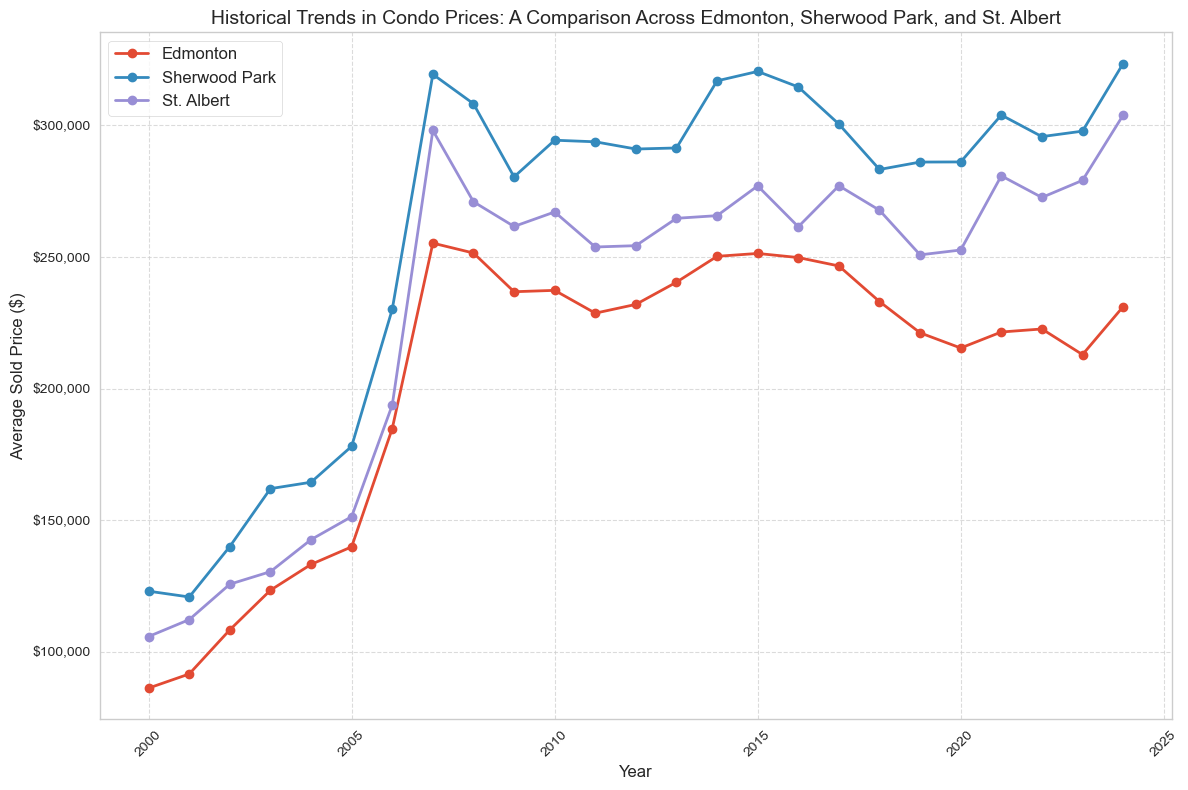

Average Condo Prices by Year and City:
Area/City       Edmonton  Sherwood Park     St. Albert
Year                                                  
2000        86257.416667  123071.268657  105854.758242
2001        91620.795181  120873.663366  112273.748858
2002       108393.236850  140045.350427  125729.189922
2003       123431.708099  162028.947368  130492.656566
2004       133246.836850  164465.116279  142662.543408
2005       139923.560741  178106.646018  151385.437288
2006       184842.897014  230143.565891  193786.473846
2007       255299.550874  319438.402597  298107.486842
2008       251542.206720  308260.163158  271016.803279
2009       236836.990945  280474.333333  261636.745247
2010       237355.654391  294395.418367  267140.253676
2011       228691.531234  293795.930481  253828.884462
2012       232021.951042  291050.226316  254336.327511
2013       240463.906399  291453.210280  264732.863309
2014       250290.580117  316951.124481  265739.467181
2015       251378.061220  

In [21]:


# Filter for the three cities
target_cities = ['Edmonton', 'Sherwood Park', 'St. Albert']
filtered_df = df[df['Area/City'].isin(target_cities)]

# Group by Year and Area/City to get average prices
yearly_avg_prices = filtered_df.groupby(['Year', 'Area/City'])['Sold Price'].mean().reset_index()
pivot_df = yearly_avg_prices.pivot(index='Year', columns='Area/City', values='Sold Price')

# Plot the historical trends
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

for city in target_cities:
    if city in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[city], marker='o', linewidth=2, label=city)

plt.title('Historical Trends in Condo Prices: A Comparison Across Edmonton, Sherwood Park, and St. Albert', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sold Price ($)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

from matplotlib.ticker import FuncFormatter

def currency_formatter(x, pos):
    return '${:,.0f}'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.tight_layout()
plt.show()

# Create a table showing the average prices by year for each city
print('Average Condo Prices by Year and City:')
print(pivot_df)

# Calculate overall stats for each city
print('\
Overall Statistics by City:')
city_stats = filtered_df.groupby('Area/City')['Sold Price'].agg(['mean', 'median', 'count']).reset_index()
city_stats.columns = ['City', 'Average Price', 'Median Price', 'Number of Transactions']
city_stats['Average Price'] = city_stats['Average Price'].map('${:,.2f}'.format)
city_stats['Median Price'] = city_stats['Median Price'].map('${:,.2f}'.format)
print(city_stats)

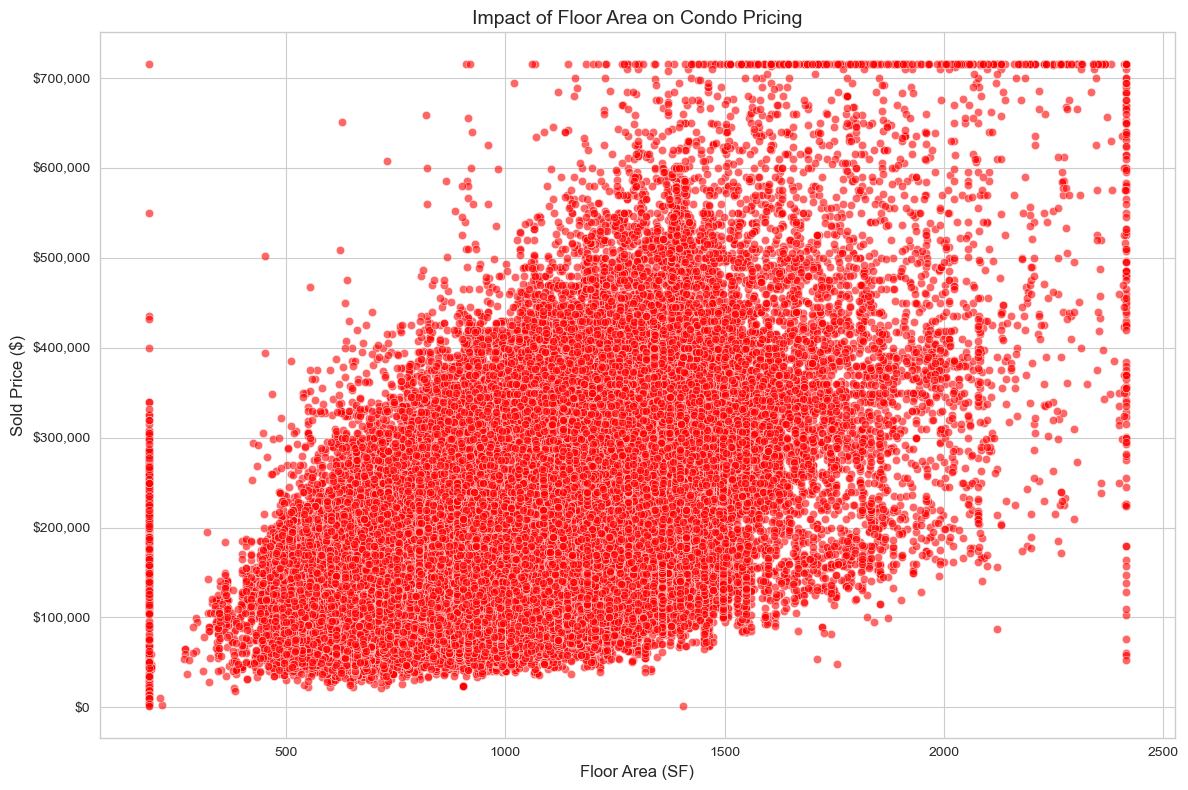

In [23]:

# Floor Area vs Sold Price Analysis
analysis_df = df[['FlrArea SF', 'Sold Price', 'Rooms AG']].dropna()
analysis_df[['FlrArea SF', 'Sold Price']] = analysis_df[['FlrArea SF', 'Sold Price']].apply(pd.to_numeric, errors='coerce')
analysis_df = analysis_df[(analysis_df['FlrArea SF'] > 0) & (analysis_df['Sold Price'] > 0)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='FlrArea SF', y='Sold Price', data=analysis_df, color='red', alpha=0.6)
plt.title('Impact of Floor Area on Condo Pricing', fontsize=14)
plt.xlabel('Floor Area (SF)', fontsize=12)
plt.ylabel('Sold Price ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.tight_layout()
plt.show()


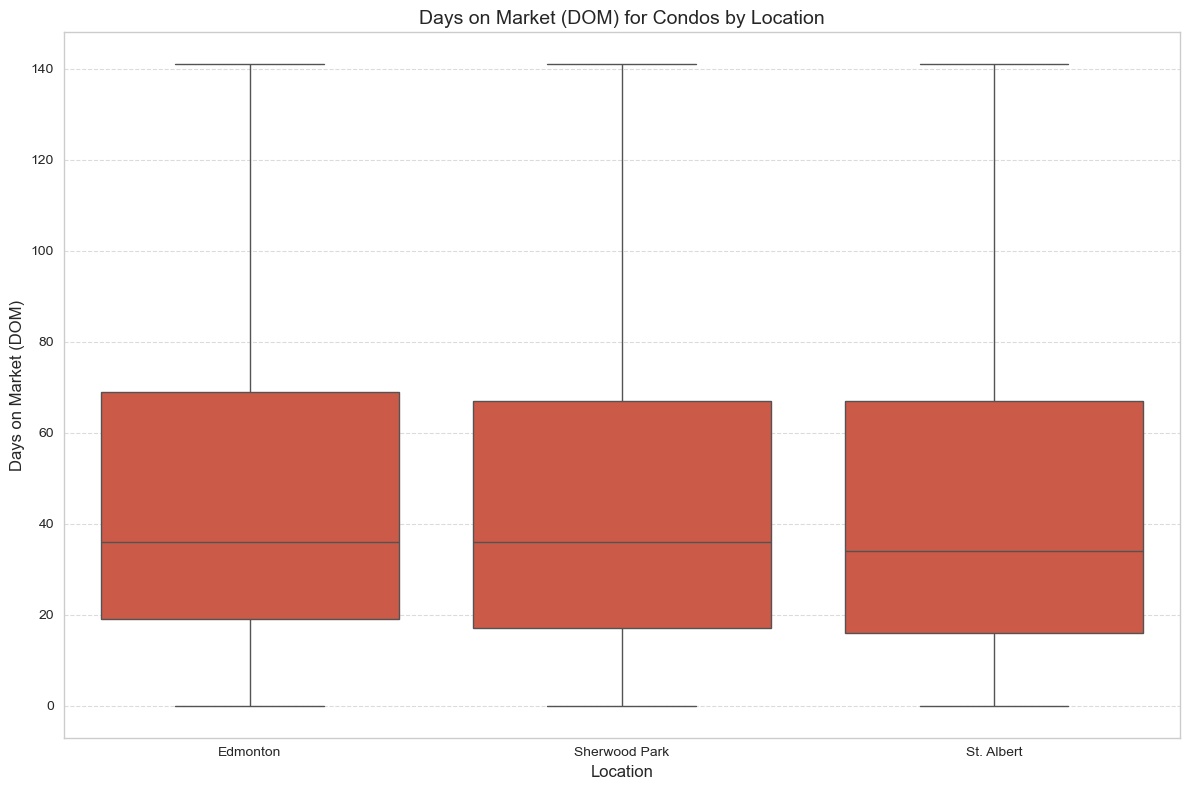

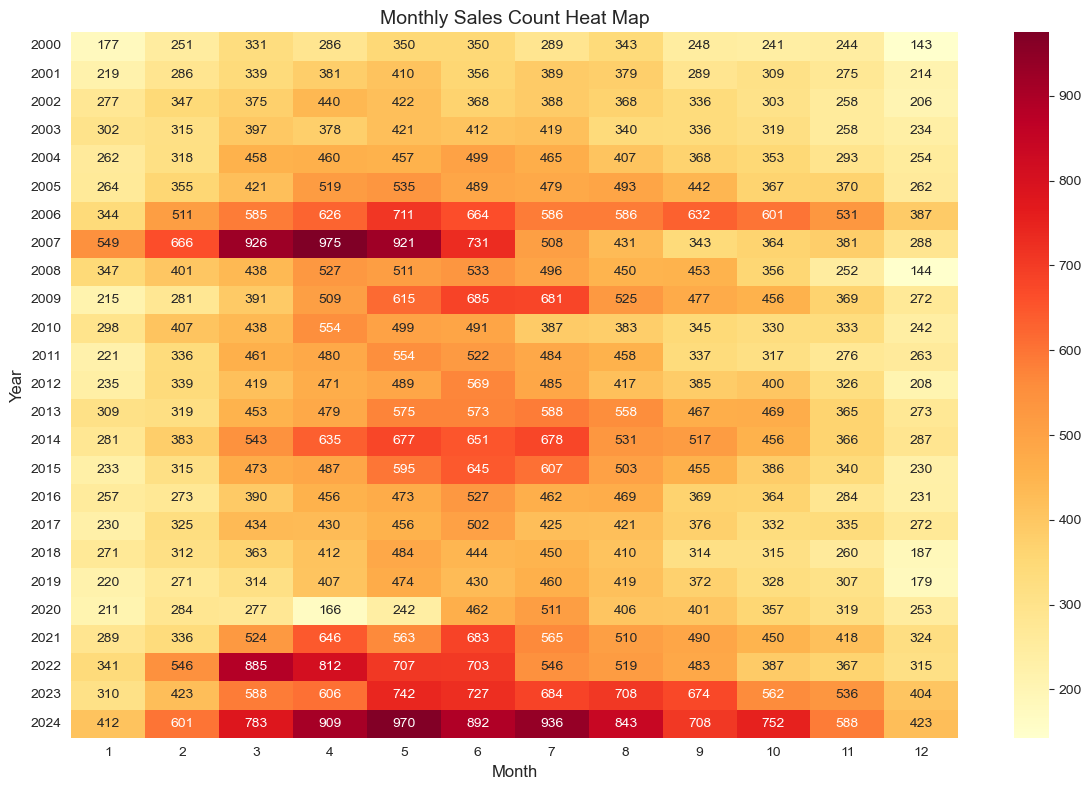

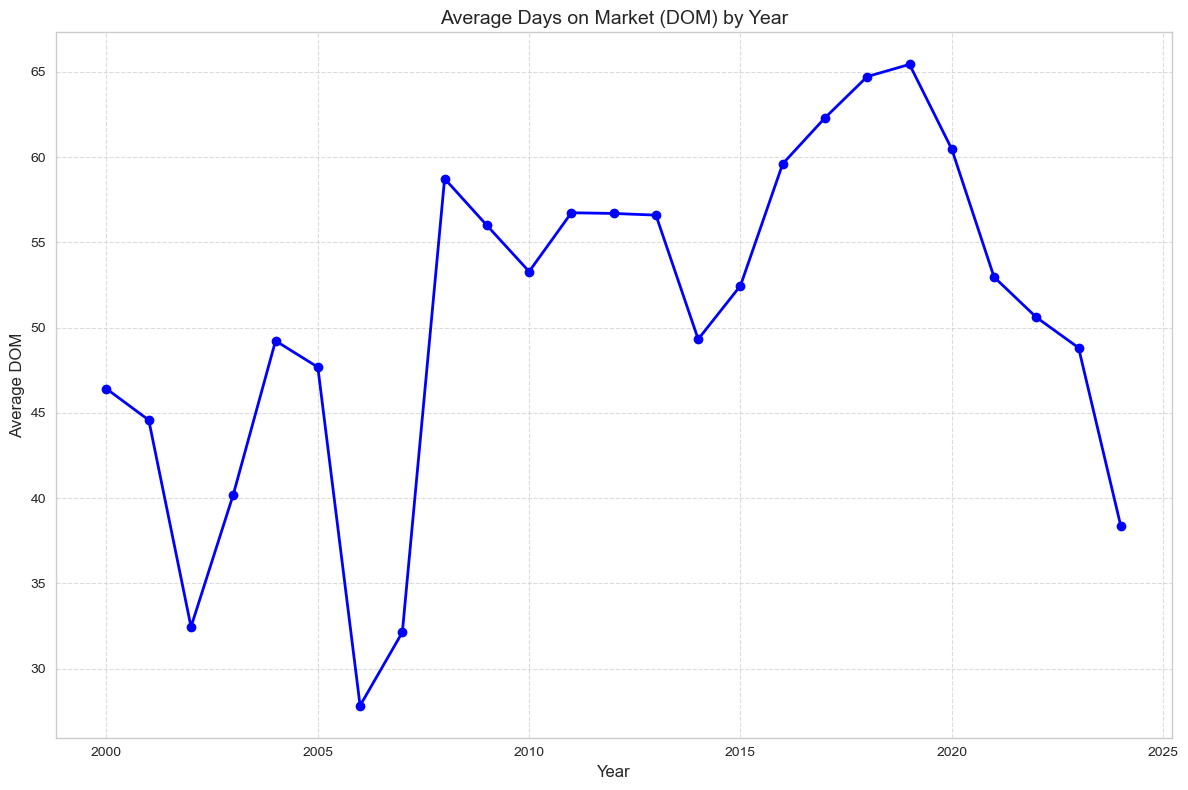

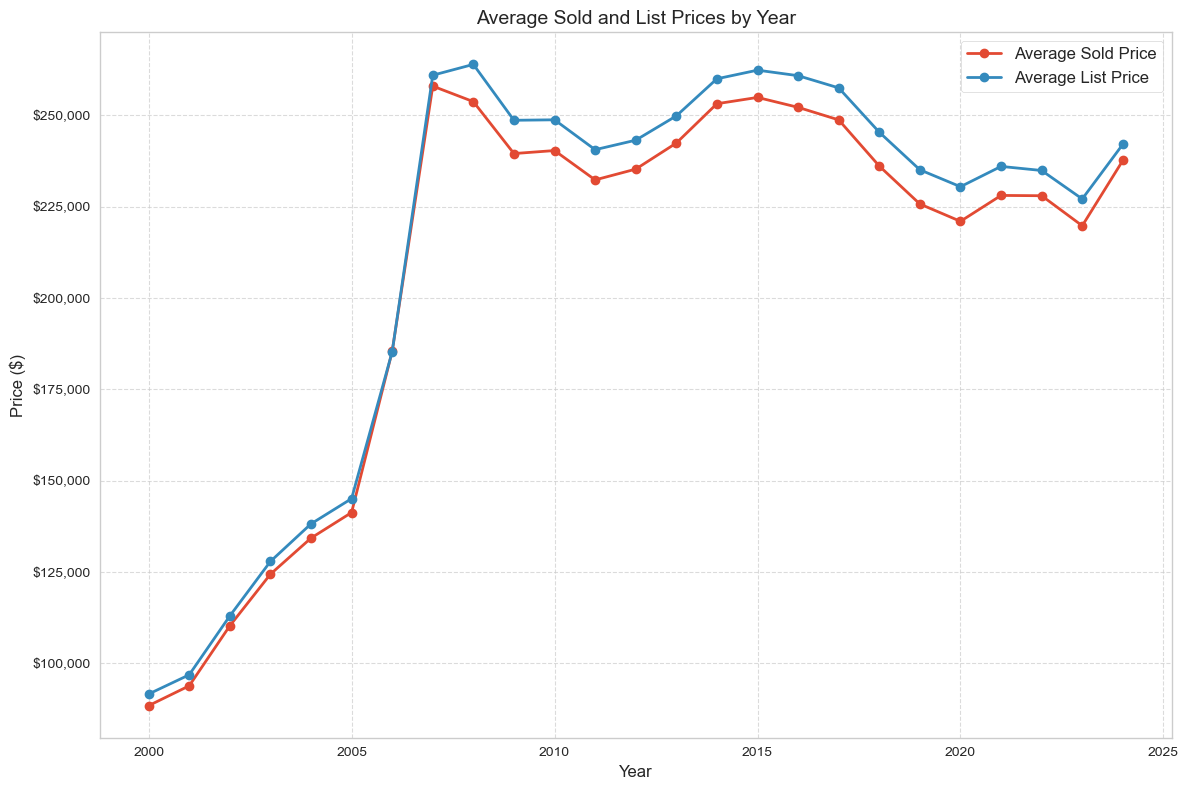

In [24]:
# Days on Market (DOM) Analysis
df_dom = df[df['Area/City'].isin(target_cities)]
plt.figure(figsize=(12, 8))
sns.boxplot(x='Area/City', y='DOM', data=df_dom)
plt.title("Days on Market (DOM) for Condos by Location", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Days on Market (DOM)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Monthly Sales Count Heat Map
sales_counts = df.pivot_table(index='Year', columns='Month', values='Listing ID #', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_counts, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title("Monthly Sales Count Heat Map", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.tight_layout()
plt.show()

# Average DOM by Year
avg_dom_by_year = df.groupby('Year')['DOM'].mean()
plt.figure(figsize=(12, 8))
plt.plot(avg_dom_by_year.index, avg_dom_by_year.values, marker='o', linewidth=2, color='blue')
plt.title("Average Days on Market (DOM) by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average DOM", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Average Sold and List Prices by Year
avg_prices_by_year = df.groupby('Year')[['Sold Price', 'List Price']].mean()
plt.figure(figsize=(12, 8))
plt.plot(avg_prices_by_year.index, avg_prices_by_year['Sold Price'], marker='o', linewidth=2, label='Average Sold Price')
plt.plot(avg_prices_by_year.index, avg_prices_by_year['List Price'], marker='o', linewidth=2, label='Average List Price')
plt.title("Average Sold and List Prices by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_11948\3184377418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area/City', y='Sold Price', data=city_avg_prices, palette='viridis')


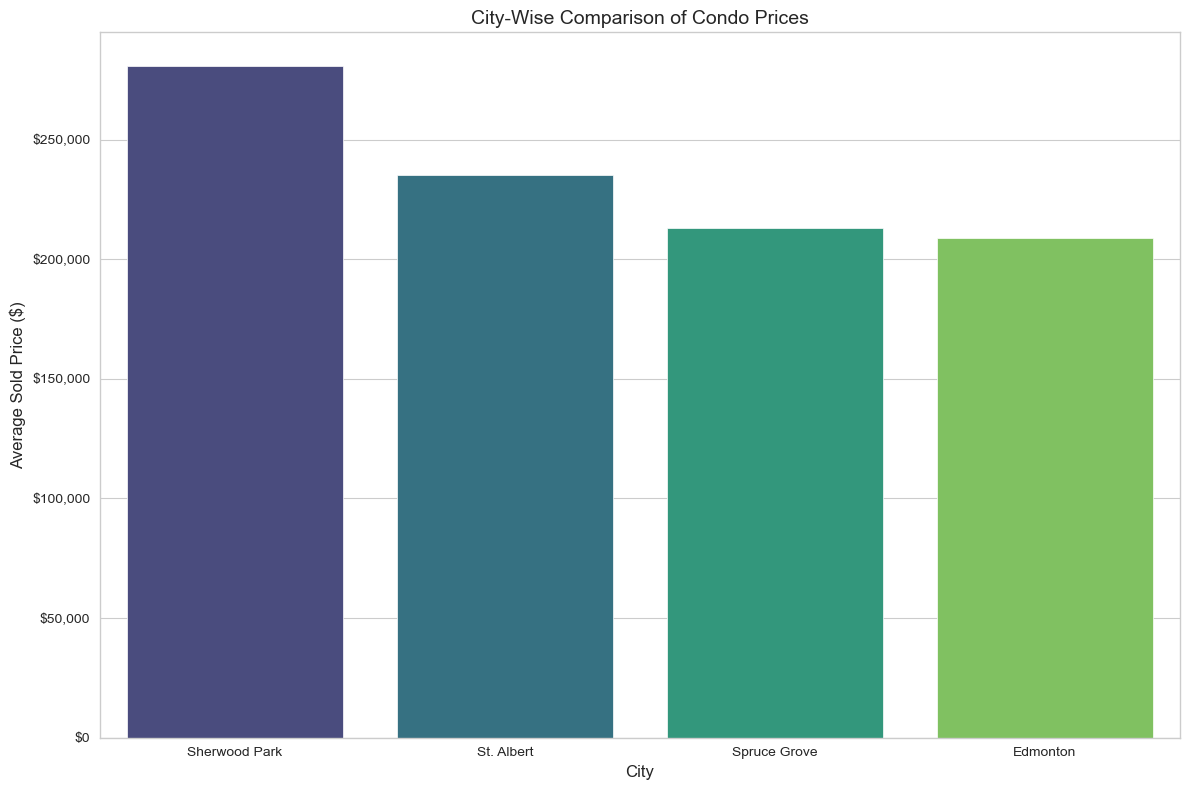

Average Condo Prices by City:
       Area/City     Sold Price
1  Sherwood Park  280780.945764
3     St. Albert  235101.458408
2   Spruce Grove  213118.504813
0       Edmonton  208932.204661


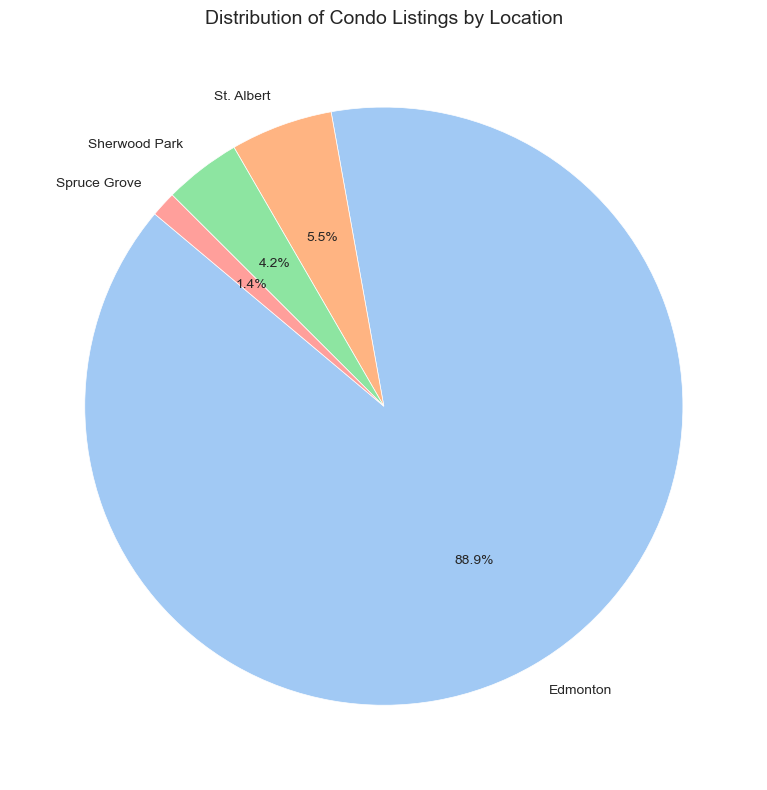

Total Listings Across the Four Cities: 121288


In [ ]:
# Define target cities
target_cities = ['Edmonton', 'St. Albert', 'Sherwood Park', 'Spruce Grove']
filtered_df = df[df['Area/City'].isin(target_cities)]

# City-Wise Comparison of Condo Prices
city_avg_prices = filtered_df.groupby('Area/City')['Sold Price'].mean().reset_index().sort_values('Sold Price', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Area/City', y='Sold Price', data=city_avg_prices, palette='viridis')
plt.title("City-Wise Comparison of Condo Prices", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Sold Price ($)", fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

print("Average Condo Prices by City:")
print(city_avg_prices)

# Distribution of Condo Listings by Location
listings_count = filtered_df['Area/City'].value_counts()
total_listings = listings_count.sum()

plt.figure(figsize=(10, 8))
plt.pie(listings_count, labels=listings_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Condo Listings by Location", fontsize=14)
plt.tight_layout()
plt.show()

print("Total Listings Across the Four Cities:", total_listings)


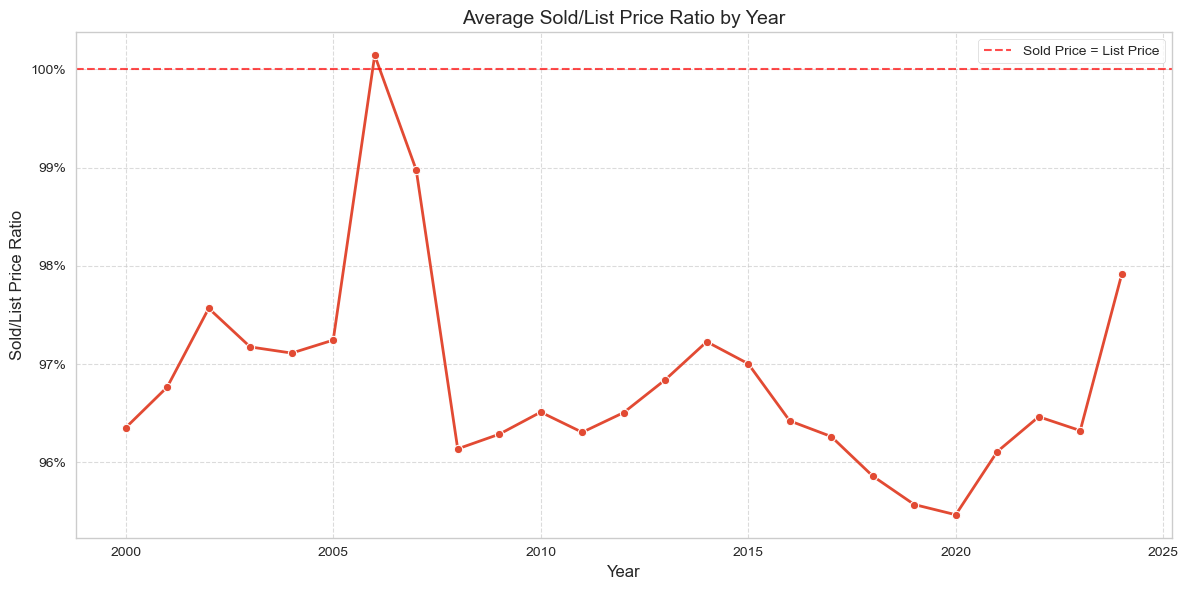

Average Sold/List Price Ratio by Year:
 Year Sold/List Ratio
 2000          96.35%
 2001          96.77%
 2002          97.57%
 2003          97.17%
 2004          97.11%
 2005          97.24%
 2006         100.14%
 2007          98.98%
 2008          96.14%
 2009          96.29%
 2010          96.51%
 2011          96.31%
 2012          96.51%
 2013          96.84%
 2014          97.23%
 2015          97.00%
 2016          96.42%
 2017          96.26%
 2018          95.86%
 2019          95.57%
 2020          95.47%
 2021          96.11%
 2022          96.46%
 2023          96.32%
 2024          97.91%


In [34]:
# Remove rows with missing Sold Date
df.dropna(subset=['Sold Date'], inplace=True)

# Create a Year column
df['Year'] = df['Sold Date'].dt.year

# Calculate the sold/list price ratio and filter out extreme outliers
df['Sold/List Ratio'] = df['Sold Price'] / df['List Price']
df = df[(df['Sold/List Ratio'].between(0.5, 1.5))]

# Group by year and calculate average ratio
yearly_ratio = df.groupby('Year')['Sold/List Ratio'].mean().reset_index()

# Create the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Sold/List Ratio', data=yearly_ratio, marker='o', linewidth=2)

# Add a horizontal reference line at 1.0
plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.7, label='Sold Price = List Price')

# Format the y-axis as percentage
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0%}'.format(x)))

# Set labels and title
plt.title('Average Sold/List Price Ratio by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sold/List Price Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the yearly ratios for reference
print("Average Sold/List Price Ratio by Year:")
print(yearly_ratio.to_string(index=False, formatters={'Sold/List Ratio': lambda x: f'{x:.2%}'}))
